In [4]:
import numpy as np
import matplotlib.pyplot as plt


In [8]:
import geohash2
print ('Geohash for 30.31876, 120.18303:', geohash2.encode(30.31876, 120.18303))
print ('Geohash for 30.31876, 120.18303:', geohash2.encode(30.31876, 120.18303, precision=10))
print ('Coordinate for Geohash wtmkqz6eee7:', geohash2.decode('wtmkqz6eee7'))


Geohash for 30.31876, 120.18303: wtmkqz6eedd2
Geohash for 30.31876, 120.18303: wtmkqz6eed
Coordinate for Geohash wtmkqz6eee7: ('30.31876', '120.18303')


[1 1 1 ... 2 0 0]
cluster_centers: [[ 0.95599367 -0.91612234]
 [ 0.99957414  0.89275465]
 [-0.95425416 -1.01960393]]
number of estimated clusters : 3


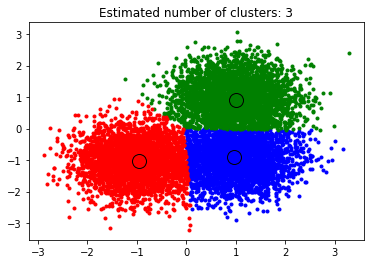

In [11]:
# -*- coding:utf-8 -*-
# Mean-Shift
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift, estimate_bandwidth
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle  ##python自带的迭代器模块


##产生随机数据的中心
centers = [[1, 1], [-1, -1], [1, -1]]
##产生的数据个数
n_samples=10000
##生产数据
X, _ = make_blobs(n_samples=n_samples, centers= centers, cluster_std=0.6,
                  random_state =0)

##带宽，也就是以某个点为核心时的搜索半径
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)
##设置均值偏移函数
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
##训练数据
ms.fit(X)
##每个点的标签
labels = ms.labels_
print(labels)
##簇中心的点的集合
cluster_centers = ms.cluster_centers_
print('cluster_centers:',cluster_centers)
##总共的标签分类
labels_unique = np.unique(labels)
##聚簇的个数，即分类的个数
n_clusters_ = len(labels_unique)
print("number of estimated clusters : %d" % n_clusters_)


##绘图
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    ##根据lables中的值是否等于k，重新组成一个True、False的数组
    my_members = labels == k
    cluster_center = cluster_centers[k]
    ##X[my_members, 0] 取出my_members对应位置为True的值的横坐标
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()